# Grading Concept Maps



In [54]:
from cxlparser import Cxl
import os
from cxldata import ScoredCxl
import networkx
from matplotlib import pyplot
from numpy import polyfit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.optimize import curve_fit 

In [48]:
paths = [f"cmaps\Student\cmap {i}.cxl" for i in range(12,18)] # Bacterial Characteristics
expert_paths = [f"cmaps/Expert/{i}" for i in ['Andriacchi Concept Map.cmap.cxl','Barker Concept Map.cmap.cxl', 'Brock Concept Map.cmap.cxl', "Buchs Concept Map.cmap.cxl",'Eberhardt Concept Map.cmap.cxl','Goldberg Concept Map.cmap.cxl','Klasnej Concept Map.cmap.cxl','Kriewall Concept Map.cmap.cxl','Kunst Concept Map.cmap.cxl','Long L Last Name Concept Map.cmap.cxl','Manns Concept Map.cmap.cxl','Rice Concept Map.cmap.cxl','TNL Concept Map2.cmap.cxl']]
fuzzy = False
parsed_cmaps = [Cxl(i, fuzzy, os.path.basename(i)) for i in paths]
parsed_expert_cmaps = [Cxl(i, fuzzy, os.path.basename(i)) for i in expert_paths]
for i in range(len(parsed_cmaps)):
    parsed_cmaps[i].parse_map()
for i in range(len(parsed_expert_cmaps)):
    parsed_expert_cmaps[i].parse_map()
[str(i) for i in parsed_cmaps]
print(str([parsed_cmaps[1].graph.nodes.items()]))
parsed_cmaps[1]._find_leaves()
# Cxl.show_map(parsed_cmaps[1])



<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\isaac\AppData\Local\Temp\ipykernel_19328\1753860714.py:1: SyntaxWarning: invalid escape sequence '\S'
  paths = [f"cmaps\Student\cmap {i}.cxl" for i in range(12,18)] # Bacterial Characteristics


[ItemsView(NodeView(('1076972485063_809123283_1709', '1076972365555_1121819080_1512', '1076972490631_1053331961_1719', '1076972372756_1606058299_1524', '1076972481888_1927974375_1703', '1076972483661_810202150_1706', '1076972375300_1260238532_1527', '1076972480977_2001049632_1700', '1076972367789_217013117_1515', '1076972488148_1185716479_1713', '1076972371184_1834586465_1521', '1076972369842_774952689_1518', '1076972489259_893146424_1716', '1076972364253_429441262_1508')))]


{'1075566173896_1888975179_599': 0.37803870707709514, '1075566887552_1163595716_1153': 0.44022415866176645, '1075565897949_1046771938_453': 0.2899804127257568, '1075566286207_1539665429_660': 0.15144537424867588, '1075566347485_995444389_724': 0.15144537424867588, '1075566157802_1030331098_584': 0.24702556543501403, '1075567490679_407903975_1530': 0.03697091665397107, '1075567453055_493582270_1479': 0.11561933907905328, '1075564831926_998769682_89': 0.3350718017608743, '1075564804667_1472323228_75': 0.08118564513669155, '1075565306238_1309317803_257': 0.00664945124934453, '1075565383489_669470229_289': 0.0016111951086314144, '1075565585710_126715963_378': 0.17230747187133597, '1075565952297_611873453_484': 0.044352880974592584, '1075564977726_471404118_158': 0.08666386267535357, '1075565136764_176636663_192': 0.02260941502971385, '1075567631722_962887267_1635': 0.19183283410590307, '1075567148247_65847469_1348': 0.3515276050241805, '1075566735333_1839812718_975': 0.23151838729413143, '

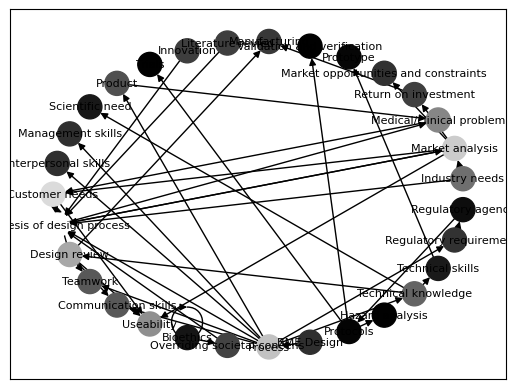

In [49]:
"""sc = ScoredCxl(parsed_cmaps[1])
sc.score_density()
print("\n".join([", ".join(["".join([k if k != '\n' else " " for k in sc.cmap.concepts_by_id[i]['label']]) for i in j]) for j in list(sc.score(1))]))
sc.find_centers(True, True)

sorted_items = sorted(sc.center["page_rank"].items(), key=lambda item: item[1])
print("!!! -> ",sorted_items)
sc.cmap._find_leaves()
print(sc.cmap.no_incoming_ids,sc.cmap.no_outgoing_ids)
print(networkx.barycenter(sc.cmap.graph.to_undirected()))
print(float(Cxl.link_count(sc.cmap, networkx.barycenter(sc.cmap.graph.to_undirected())[0], [Cxl.LinkType.CROSS, Cxl.LinkType.REVERSE]))/Cxl.link_count(sc.cmap, networkx.barycenter(sc.cmap.graph.to_undirected())[0], [Cxl.LinkType.ALL]))
print(float(Cxl.link_count(sc.cmap, None, [Cxl.LinkType.CROSS, Cxl.LinkType.REVERSE]))/Cxl.link_count(sc.cmap, None, [Cxl.LinkType.ALL]))
print(networkx.transitivity(sc.cmap.graph))"""

scored_students = [j for j in [ScoredCxl(i) for i in parsed_cmaps]]
scored_experts = [j for j in [ScoredCxl(i) for i in parsed_expert_cmaps]]
for i in range(len(scored_experts)):
    t = 10**-6
    while t<10:
        try:
            scored_experts[i].find_centers()
            #print(i)
            break
        except:
            t*=10

#print(([float(Cxl.link_count(i.cmap,None, [Cxl.LinkType.CROSS, Cxl.LinkType.REVERSE]))/float(Cxl.link_count(i.cmap,None, [Cxl.LinkType.ALL])) for i in scored_students]))
#print(([float(Cxl.link_count(i.cmap,None, [Cxl.LinkType.CROSS, Cxl.LinkType.REVERSE]))/float(Cxl.link_count(i.cmap,None, [Cxl.LinkType.ALL])) for i in scored_experts]))

#print(sum([float(Cxl.link_count(i.cmap,None, [Cxl.LinkType.CROSS, Cxl.LinkType.REVERSE]))/float(Cxl.link_count(i.cmap,None, [Cxl.LinkType.ALL])) for i in scored_students])/(len(scored_students)))
#print(sum([float(Cxl.link_count(i.cmap,None, [Cxl.LinkType.CROSS, Cxl.LinkType.REVERSE]))/float(Cxl.link_count(i.cmap,None, [Cxl.LinkType.ALL])) for i in scored_experts])/(len(scored_experts)))
#print([len(list(networkx.simple_cycles(i.cmap.graph))) for i in scored_experts])
# print([len(list(networkx.simple_cycles(i.cmap.graph))) for i in scored_students])
countvscycles = ([((0,0,1), (len(i.cmap.concepts_by_id),len(i.cmap.graph.edges), len(list(networkx.simple_cycles(i.cmap.graph))))) for i in scored_experts]+[((1,0,0), (len(i.cmap.concepts_by_id),len(i.cmap.graph.edges), len(list(networkx.simple_cycles(i.cmap.graph))))) for i in scored_students])
#print(scored_experts[0].center["eigenvector_center"])
scored_experts[0].show_map_coloring()



[[31, 33, 33, 20, 29, 29, 21, 46, 32, 33, 30, 35, 33, 13, 14, 39, 23, 34, 53], [42, 34, 57, 30, 32, 29, 25, 59, 37, 35, 29, 64, 100, 16, 15, 51, 26, 40, 62], [4, 1, 13, 2, 0, 0, 1, 5, 1, 1, 0, 26, 386, 0, 2, 0, 0, 0, 0]]


'\nXY_grid = np.column_stack((X_grid.ravel(), Y_grid.ravel()))\nXY_poly_grid = poly.transform(XY_grid)\nZ_grid = model.predict(XY_poly_grid).reshape(X_grid.shape)\np.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5)\n'

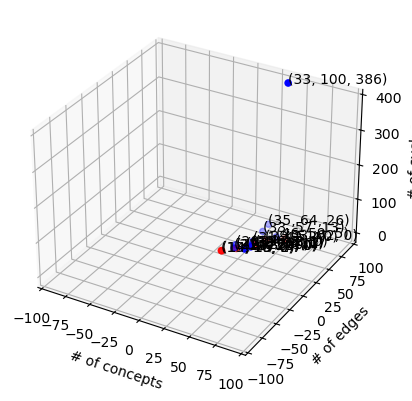

In [ ]:
"""toremove = 0
for i in range(len(countvscycles)):
    if countvscycles[i][1][2] > countvscycles[0][1][2]:
        toremove = i"""

def func(xy, a, b, c, d, e, f): 
    x, y = xy
    return a + b*x + c*y + d*x**2 + e*y**2 + f*x*y

# countvscycles.pop(toremove)
p1 = pyplot.figure()
p = p1.add_subplot(projection='3d')

p.set_ylabel("# of edges")
p.set_xlabel("# of concepts")
p.set_zlabel("# of cycles")
pyplot.xlim(-100,100)
pyplot.ylim(-100,100)
p.viewLim()

p.scatter([i[1][0] for i in countvscycles],[i[1][1] for i in countvscycles],[i[1][2] for i in countvscycles], color=[i[0] for i in countvscycles])
data = []
data2 = [[],[],[]]
for i in [i[1] for i in countvscycles]:
    p.text(i[0],i[1],i[2],f"{i}")
    data.append((i[0],i[1],i[2]))
    data2[0].append(i[0])
    data2[1].append(i[1])
    data2[2].append(i[2])
print(data2)

"""
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(np.transpose(data2[0:2]))



model = LinearRegression()
model.fit(X_poly, data2[2])
"""
x_range = np.linspace(0, 100, 1)
y_range = np.linspace(0, 100, 1)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
popt, pcov = curve_fit(func, (data2[0], data2[1]), data2[2]) 
Z = func((X_grid, Y_grid), *popt) 
"""
XY_grid = np.column_stack((X_grid.ravel(), Y_grid.ravel()))
XY_poly_grid = poly.transform(XY_grid)
Z_grid = model.predict(XY_poly_grid).reshape(X_grid.shape)
p.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5)
"""
pyplot.show()

